# Real World Network?

In this notebook we explore the 115 House retweets dataset which is a political network where nodes represent 115th House congress members and edges represent retweets among them, i.e., edge (u,v) means u retweeted
v at least once. We want to answer the question: Is this network represent a real world social network? or in other words does the characteristics of a real world network applies to this network as well?

In [1]:
import pandas as pd
import networkx as nx
import datetime as dt
import io
import matplotlib.pyplot as plt
import numpy as np

## Load Grahp

The graph is of course directed (edge (u,v) mean user u retweeted user v), but We are doing it as undirected for simplicity

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 115th House retweets.gexf to 115th House retweets.gexf


In [3]:
G= nx.read_gexf(io.BytesIO(uploaded['115th House retweets.gexf']), node_type=None, relabel=False, version='1.2draft')
print('Number of Nodes: ', G.number_of_nodes())
print('Number of Edges: ',G.number_of_edges())

Number of Nodes:  432
Number of Edges:  10496


## Convert graph to undirected graph

In [4]:
G_undirected= G.to_undirected(reciprocal=False, as_view=False)
print('Number of Nodes: ', G_undirected.number_of_nodes())
print('Number of Edges: ',G_undirected.number_of_edges())

Number of Nodes:  432
Number of Edges:  8459


## Get the largest connected component G0

In [17]:
connected_components= list(nx.connected_components(G_undirected))
max_length= 0
for i in range (len(connected_components)):
    if (max_length < len(connected_components[i])):
    max_length= len(connected_components[i])
    largest_component= connected_components[i]

G0= G_undirected.subgraph(list(largest_component))
print('Number of Nodes: ', G0.number_of_nodes())
print('Number of Edges: ',G0.number_of_edges())

Number of Nodes:  431
Number of Edges:  8458


## 1. Check The power law distribution 
## The G0 Graph does meet the power law distribution *constrain* italicized text

Text(0.5, 0, 'Degree')

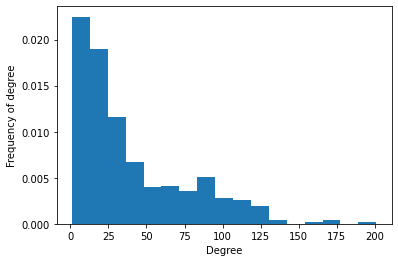

In [12]:
%matplotlib inline
#np.random.seed(42)
x = []
for v in G0:
    x.append(G0.degree(v))
    #print(f"{v:4} {G.degree(v):6}")
plt.hist(x, density=True, bins=17)  # `density=False` would make counts
plt.ylabel('Frequency of degree')
plt.xlabel('Degree')

-0.5954939411948519 1.4194997116509498


Text(0.5, 0, 'log(Degree)')

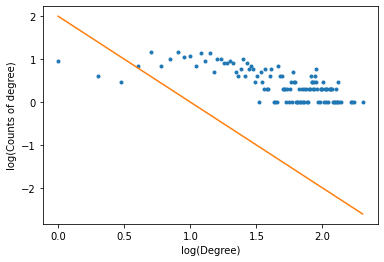

In [18]:
import math
k = []
Pk = []
graph=G0
logk = []
logPk = []


for node in list(graph.nodes()):
    degree = graph.degree(nbunch=node)
    try:
        pos = k.index(degree)
    except ValueError as e:
        k.append(degree)
        Pk.append(1)
    else:
        Pk[pos] += 1

# get a double log representation
for i in range(len(k)):
    logk.append(math.log10(k[i]))
    logPk.append(math.log10(Pk[i]))

order = np.argsort(logk)
logk_array = np.array(logk)[order]
logPk_array = np.array(logPk)[order]
plt.plot(logk_array, logPk_array, ".")
m, c = np.polyfit(logk_array, logPk_array, 1)
print(m,c)
plt.plot(logk_array, -2*logk_array + 2, "-")
plt.ylabel('log(Counts of degree)')
plt.xlabel('log(Degree)')

From the above analysis, the graph G0 is subjected to the power law distribution which means that very small portion of the social network has high connections (friends, retweets, reach, followers) and only the rest is smaller according to an exponantial distribution.

## 2. The High Clustering Coefficient Constrain

In [20]:
c = nx.average_clustering(G0) 
c

0.4270389963304332

The G0 graph meet this constrain

## 3. Small Average Path length


In [21]:
avg_path= nx.average_shortest_path_length(G0)
avg_path

2.213511034371122

The G0 graph meet this constrin with avg path length small value of 2.21

## Then: The graph G. satisfy 3 properties of the real world social network.

## 4. Find the top-10 most central nodes in the G0 network according to:

a. degree centrality

b. eigenvector centrality

c. pagerank

d. betweenness centrality

e. closeness centrality


### a. Degree Centrality

In [23]:
degree_centrality= nx.degree_centrality(G0)
degree_centrality_list= list(degree_centrality.items())
degree_centrality_sorted= sorted(degree_centrality_list, key=lambda tup: tup[1], reverse= True)
degree_centrality_sorted
max_elements = degree_centrality_sorted[0:10]
print('Top 10 Central Nodes (according to this measure) are: ', max_elements)

Top 10 Nodes are:  [('18916432', 0.46744186046511627), ('15764644', 0.40232558139534885), ('1209417007', 0.39069767441860465), ('22012091', 0.38372093023255816), ('2962868158', 0.3209302325581395), ('111635980', 0.3116279069767442), ('24195214', 0.3023255813953488), ('242426145', 0.3023255813953488), ('1077121945', 0.3023255813953488)]


### b. Eginvalue Centrality

In [24]:
eigenvector_centrality= nx.eigenvector_centrality(G0,  tol=1e-06)
eigenvector_centrality_list= list(eigenvector_centrality.items())
eigenvector_centrality_sorted= sorted(eigenvector_centrality_list, key=lambda tup: tup[1], reverse= True)
max_elements = eigenvector_centrality_sorted[0:10]
print('Top 10 Central Nodes (according to this measure) are: ', max_elements)

Top 10 Nodes are:  [('22012091', 0.18337780708977203), ('15764644', 0.18032157717456576), ('29501253', 0.1510807055229586), ('137794015', 0.14792657062995032), ('815733290955112448', 0.1452314370586416), ('40302336', 0.14225698245811277), ('111635980', 0.1342110560647157), ('384913290', 0.1265090792391857), ('1206227149', 0.12551340360413668)]


### c. Page Rank Centrality

In [25]:
pagerank_centrality= nx.pagerank(G0,alpha=0.85)
pagerank_centrality_list= list(pagerank_centrality.items())
pagerank_centrality_sorted= sorted(pagerank_centrality_list, key=lambda tup: tup[1], reverse= True)
max_elements = pagerank_centrality_sorted[0:10]
print('Top 10 Central Nodes (according to this measure) are: ', max_elements)

Top 10 Nodes are:  [('18916432', 0.016687077252074495), ('1209417007', 0.01339533968202723), ('19739126', 0.010394397111901262), ('17976923', 0.010346266266186174), ('235312723', 0.008023105914688073), ('15764644', 0.007870325263258687), ('22012091', 0.007389758933240166), ('2962868158', 0.006351644073853909), ('242426145', 0.006012976256123177)]


## d. Betweenness Centrality

In [23]:
betweenness_centrality= nx.betweenness_centrality(G0, k=None, normalized=True)
betweenness_centrality_list= list(betweenness_centrality.items())
betweenness_centrality_sorted= sorted(betweenness_centrality_list, key=lambda tup: tup[1], reverse= True)
max_elements = betweenness_centrality_sorted[0:10]
print('Top 10 Central Nodes (according to this measure) are: ', max_elements)

[('18916432', 0.12273484278137405),
 ('1209417007', 0.08843721368425678),
 ('17976923', 0.03704117830785366),
 ('19739126', 0.03394057911431364),
 ('15764644', 0.026120568153645576),
 ('14275291', 0.02449774667555187),
 ('235312723', 0.020301561604364807),
 ('22012091', 0.019495914064184754),
 ('242426145', 0.01477897207354136)]

## closeness_centrality

In [24]:
closeness_centrality= nx.closeness_centrality(G0)
closeness_centrality_list= list(closeness_centrality.items())
closeness_centrality_sorted= sorted(closeness_centrality_list, key=lambda tup: tup[1], reverse= True)
max_elements = closeness_centrality_sorted[0:10]
print('Top 10 Central Nodes (according to this measure) are: ', max_elements)

[('18916432', 0.638396309800022),
 ('1209417007', 0.6137372248721243),
 ('15764644', 0.5950101528233216),
 ('22012091', 0.5868704790500887),
 ('19739126', 0.5720030935808198),
 ('137794015', 0.5659661216169062),
 ('17976923', 0.5600552482840926),
 ('2916086925', 0.5423543870867444),
 ('2962868158', 0.5396255599819055)]

# The End